# Initial Proccessing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ue21cs342aa2/sample_submission.csv
/kaggle/input/ue21cs342aa2/train.csv
/kaggle/input/ue21cs342aa2/test.csv


In [2]:
import pandas as pd # importing libraries
import numpy as np
import math

import warnings #ignore harmless warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt #libraries to plot data
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt

from sklearn.model_selection import train_test_split #for test train spliting
from datetime import datetime #for time stamps
from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.
from sklearn.preprocessing import StandardScaler #for preprocessing

from statsmodels.tsa.arima.model import ARIMA # ARIMA

# import pmdarima as pm
# from pmdarima.arima import auto_arima

from sklearn.ensemble import RandomForestRegressor # import ensemble models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score, mean_squared_error, mean_absolute_error


In [3]:
train_df = pd.read_csv("/kaggle/input/ue21cs342aa2/train.csv")
test_df = pd.read_csv("/kaggle/input/ue21cs342aa2/test.csv")
train_df.head()
X=train_df.copy()


In [4]:
train_df.shape

(300, 6)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        300 non-null    int64  
 1   Date      300 non-null    object 
 2   Open      300 non-null    float64
 3   Close     300 non-null    float64
 4   Volume    300 non-null    int64  
 5   Strategy  300 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB


Date - Datetime Variable

In [6]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

Stratergy - Categorical Variable

In [7]:
train_df['Strategy'] = train_df['Strategy'].astype('category')
train_df['Strategy'] = train_df['Strategy'].map({"Hold":1,"Buy":2,"Sell":0})
train_df['Strategy'].value_counts()
train_df.head()

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,1
1,1,2015-06-08,64.116235,74.443331,227974800,1
2,2,2015-06-15,47.701942,71.140831,250670900,2
3,3,2015-06-22,54.754816,72.881344,223614300,1
4,4,2015-06-29,48.031899,66.284718,406814900,2


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        300 non-null    int64         
 1   Date      300 non-null    datetime64[ns]
 2   Open      300 non-null    float64       
 3   Close     300 non-null    float64       
 4   Volume    300 non-null    int64         
 5   Strategy  300 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(2)
memory usage: 12.3 KB


In [9]:
train_df.describe()

,id,Date,Open,Close,Volume
count,300.000000,300,300.000000,300.000000,3.000000e+02
mean,149.500000,2018-04-12 12:00:00,75.977813,79.430489,1.866300e+08
min,0.000000,2015-06-01 00:00:00,40.269435,47.979353,5.991330e+07
25%,74.750000,2016-11-05 06:00:00,64.872395,69.689227,1.324862e+08
50%,149.500000,2018-04-12 12:00:00,79.805683,82.991900,1.715536e+08
75%,224.250000,2019-09-17 18:00:00,88.342927,89.719145,2.201842e+08
max,299.000000,2021-02-22 00:00:00,102.558322,103.119373,6.935702e+08
std,86.746758,NaN,16.158343,13.878395,7.952792e+07


###Preproccessing

In [10]:
train_df.isnull().sum()

id          0
Date        0
Open        0
Close       0
Volume      0
Strategy    0
dtype: int64

No missing datapoints found in data

Checking for Outliers

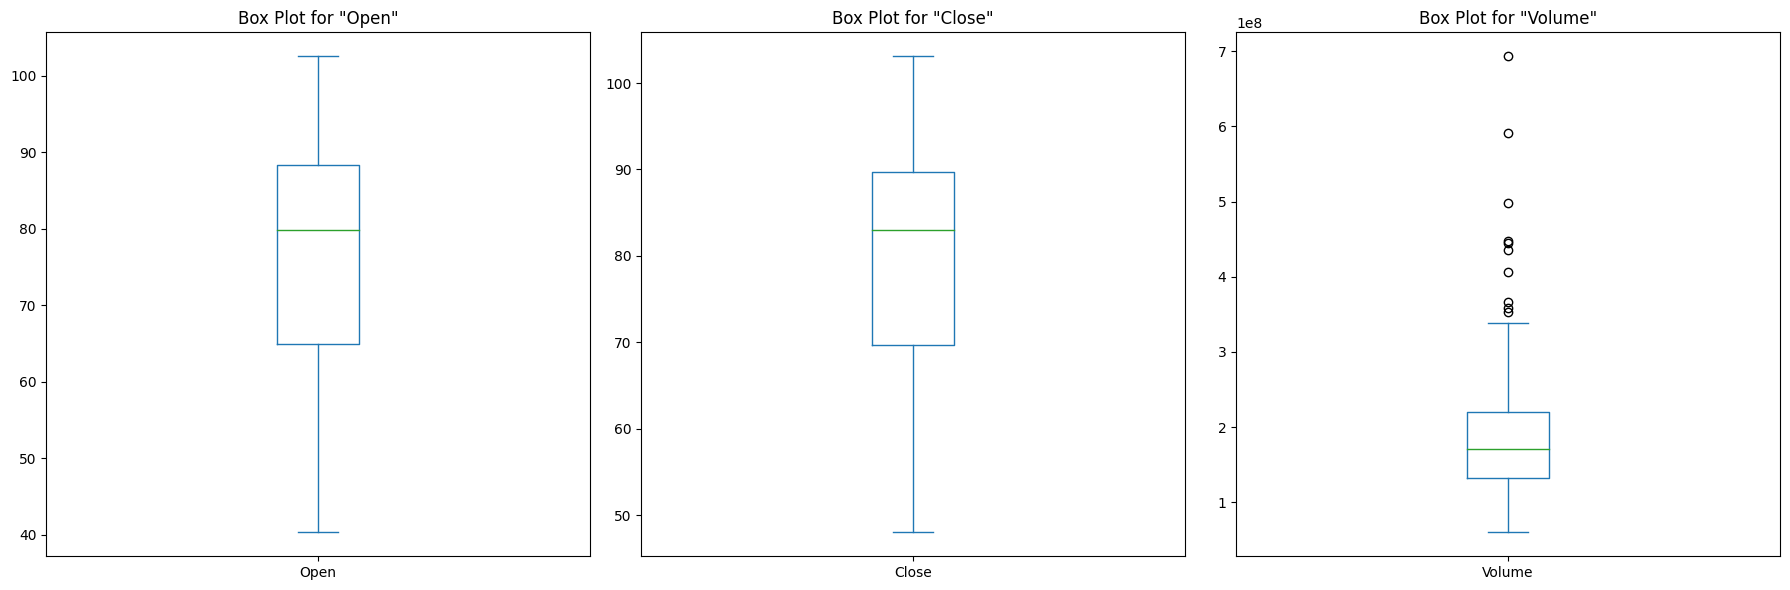

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
#Box plots for 'Open,' 'Close,' and 'Volume' columns
train_df[['Open']].plot(kind='box', ax=axes[0])
train_df[['Close']].plot(kind='box', ax=axes[1])
train_df[['Volume']].plot(kind='box', ax=axes[2])

axes[0].set_title('Box Plot for "Open"')
axes[1].set_title('Box Plot for "Close"')
axes[2].set_title('Box Plot for "Volume"')

plt.tight_layout()
plt.show()



We are choosing not to remove outliers in Volume due to the fact that it can potential increase due to different reasons

####Checking if outliers are accumulated at a specific year

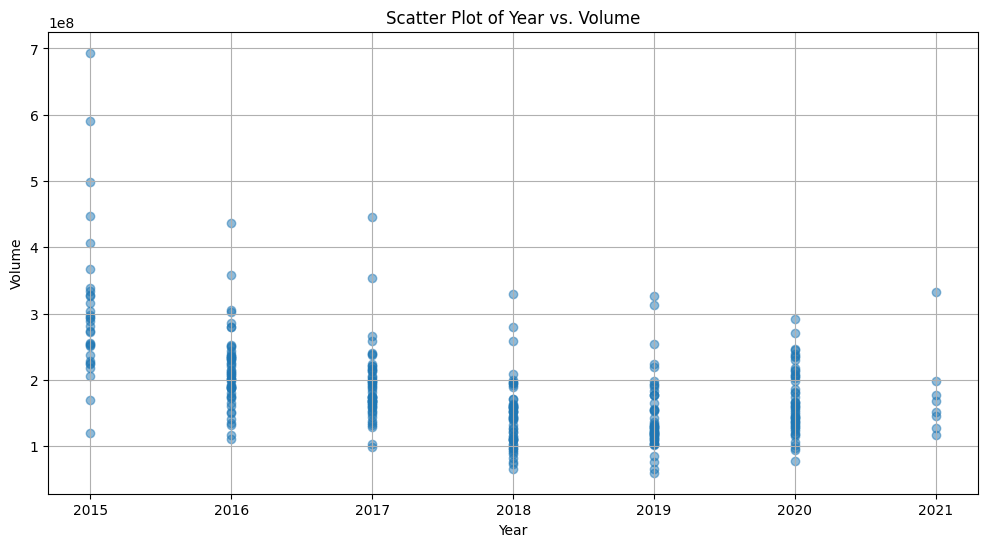

In [12]:
Date= train_df['Date']
Year=Date.dt.year
plt.figure(figsize=(12, 6))
plt.scatter(Year, train_df['Volume'], alpha=0.5)
plt.title("Scatter Plot of Year vs. Volume")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

###Visualization


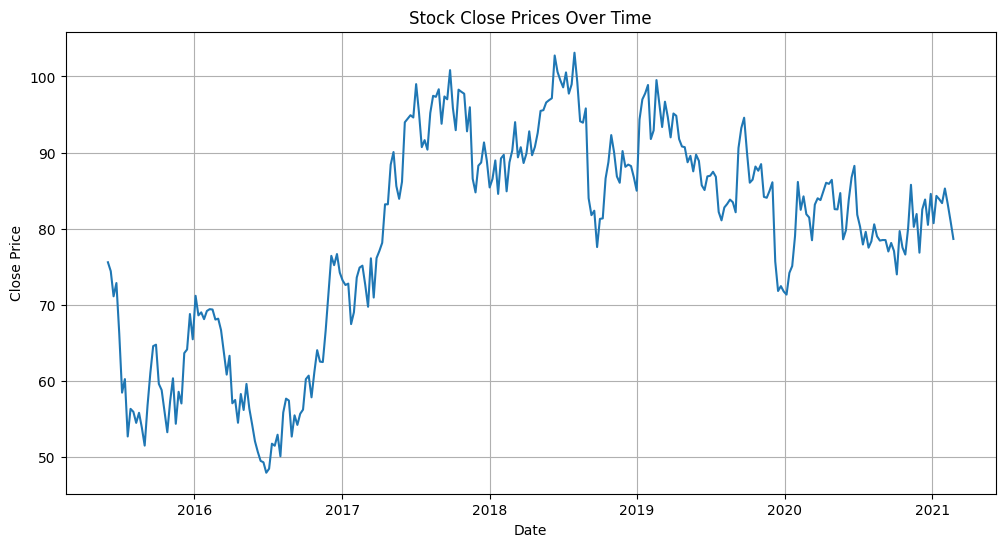

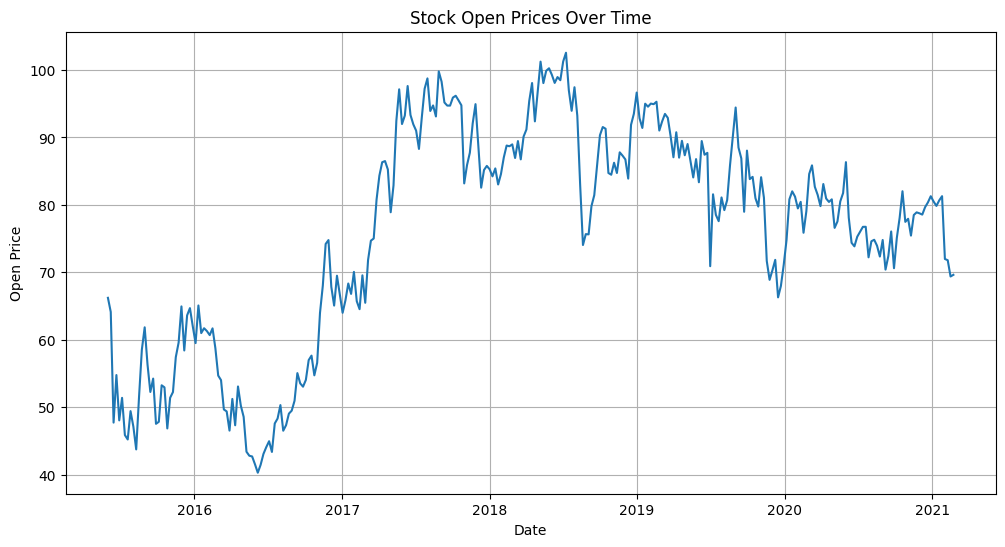

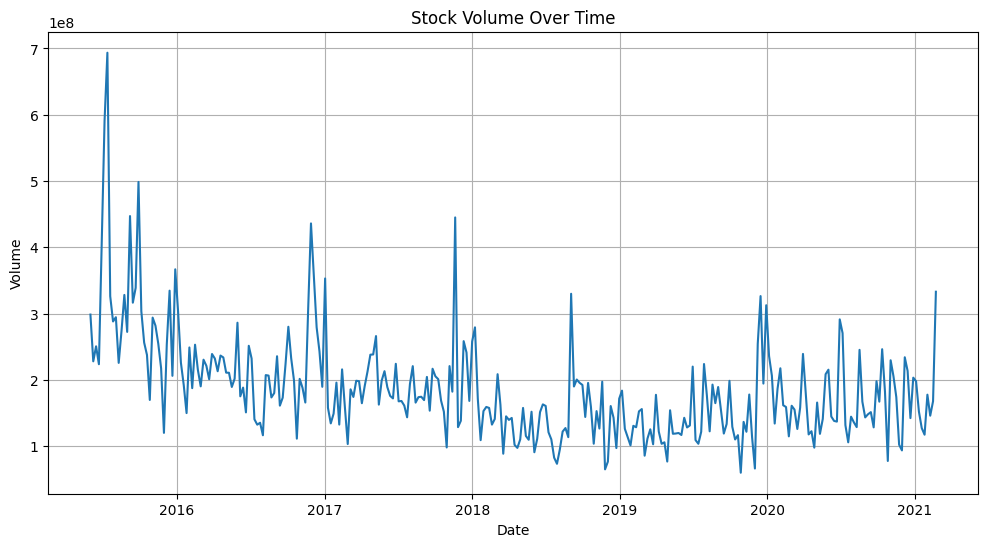

In [13]:
# Plotting the 'Close' column over time
plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['Close'])
plt.title('Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Plotting the 'Open' column over time
plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['Open'])
plt.title('Stock Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

# Plotting the 'Volume' column over time
plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['Volume'])
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


Correlation Matrix

<Axes: >

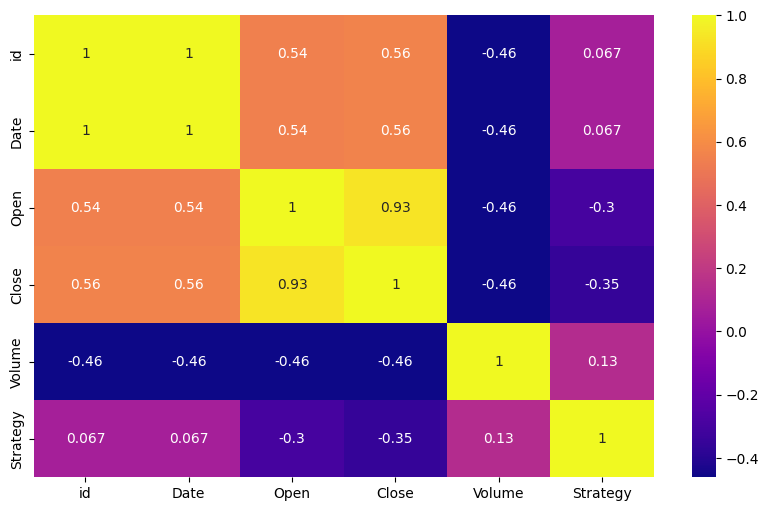

In [14]:
corr = train_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='plasma')

Distributuon Plot

<Axes: xlabel='Close', ylabel='Density'>

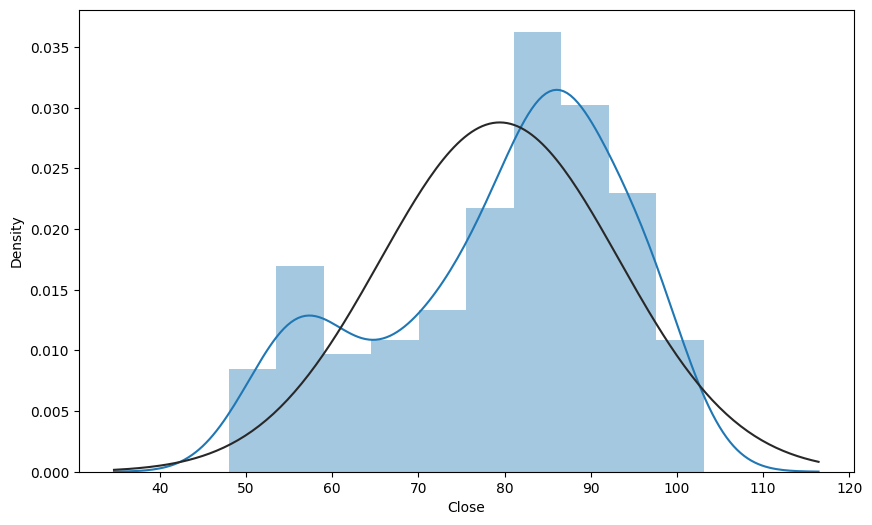

In [15]:
#for Close
plt.figure(figsize=(10,6))
sns.distplot(train_df['Close'], fit=norm)

<Axes: xlabel='Open', ylabel='Density'>

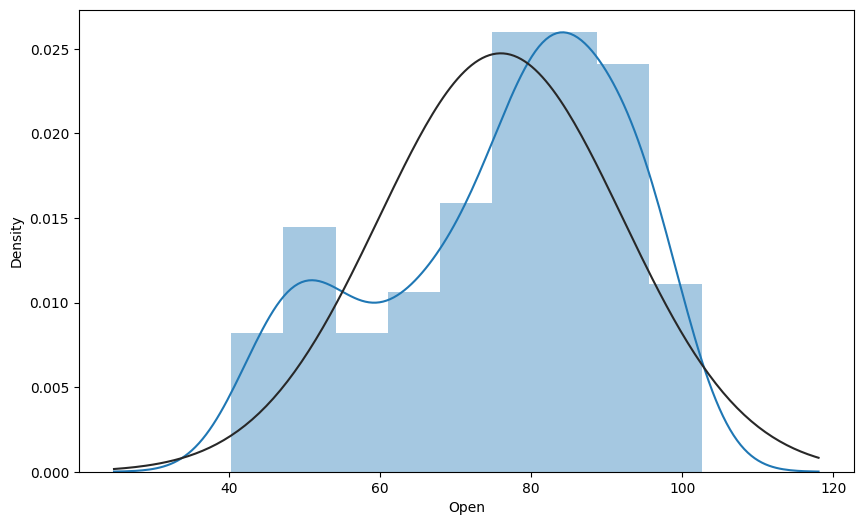

In [16]:
#for Open
plt.figure(figsize=(10,6))
sns.distplot(train_df['Open'], fit=norm)

<Axes: xlabel='Volume', ylabel='Density'>

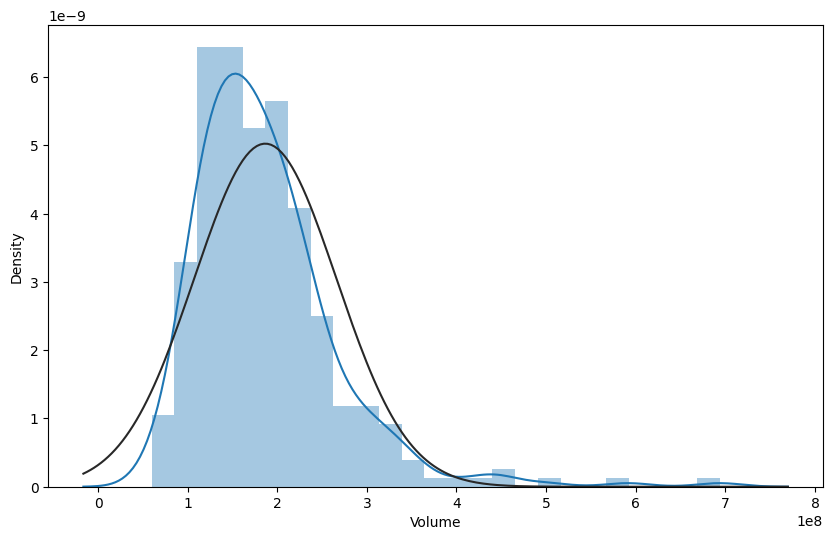

In [17]:
#for Volume
plt.figure(figsize=(10,6))
sns.distplot(train_df['Volume'], fit=norm)

Line plots

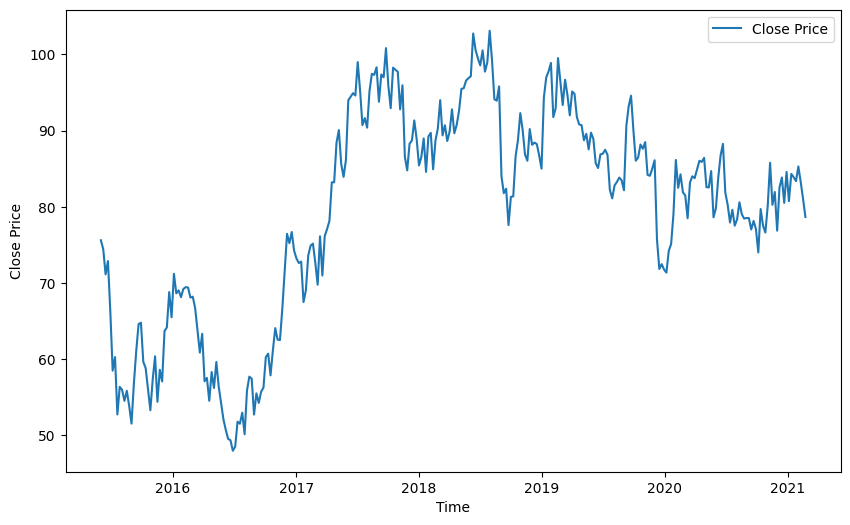

In [18]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(train_df['Date'], train_df['Close'], label='Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()

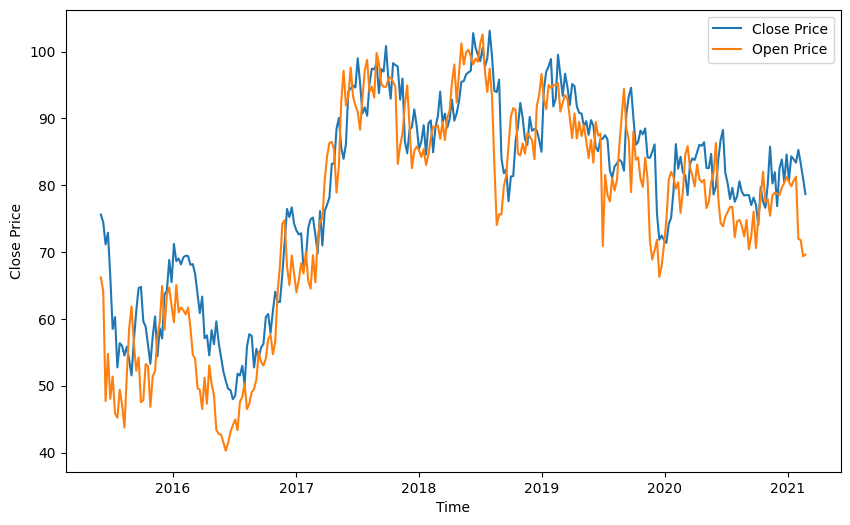

In [19]:
#Plot open vs close price over the years
plt.figure(figsize=(10, 6))
plt.plot(train_df['Date'], train_df['Close'], label='Close Price')
plt.plot(train_df['Date'], train_df['Open'], label='Open Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

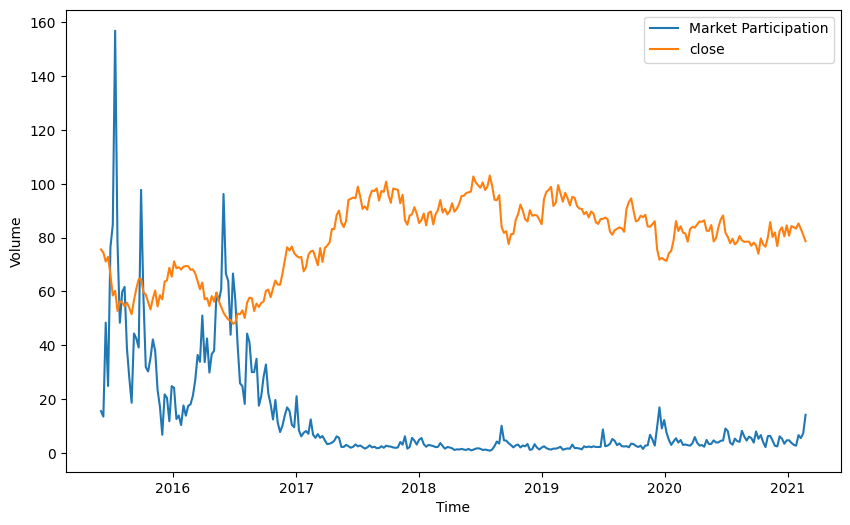

In [20]:
# plot volume over the years

plt.figure(figsize=(10, 6))
plt.plot(train_df['Date'], train_df['Volume']/(train_df['Open'])**4, label='Market Participation')
plt.plot(train_df['Date'], train_df['Close'], label='close')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()

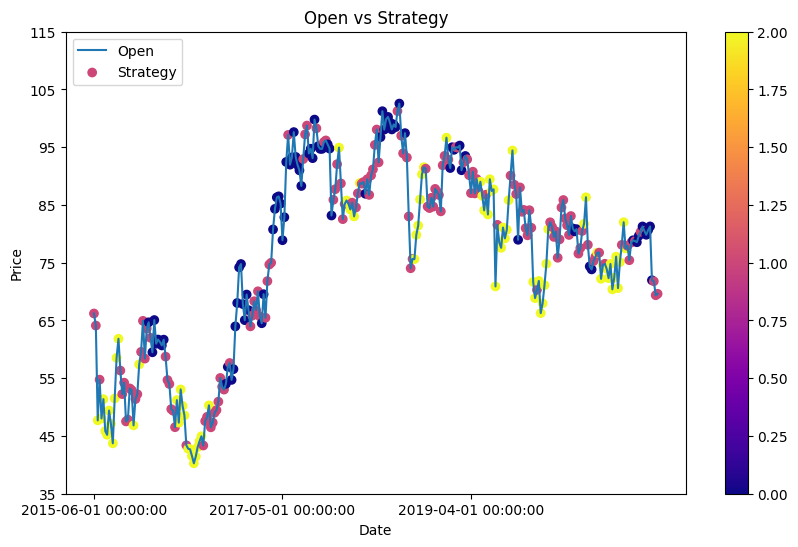

In [21]:
# plot between open and strategy over the period of time

plt.figure(figsize=(10,6))
plt.plot(train_df['Open'])
plt.scatter(train_df.index, train_df['Open'], c=train_df['Strategy'], cmap='plasma')
plt.colorbar()

plt.title('Open vs Strategy')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['Open','Strategy'], loc='upper left')

plt.xticks(np.arange(0,300, 100), train_df['Date'][0:300:100])
plt.yticks(np.arange(35, 120, 10))
plt.show()


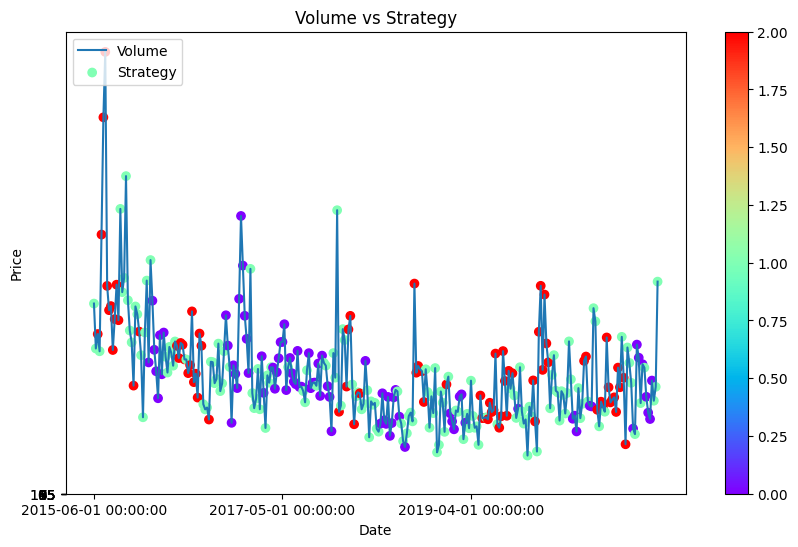

In [22]:
# plot between Volume and strategy over the period of time

plt.figure(figsize=(10,6))
plt.plot(train_df['Volume'])
plt.scatter(train_df.index, train_df['Volume'], c=train_df['Strategy'], cmap='rainbow')
plt.colorbar()

plt.title('Volume vs Strategy')
plt.ylabel('Price')
plt.xlabel('Date')

plt.legend(['Volume','Strategy'], loc='upper left')
# set x axis to have date's year
plt.xticks(np.arange(0,300, 100), train_df['Date'][0:300:100])
plt.yticks(np.arange(35, 120, 10))
plt.show()


Pariplots

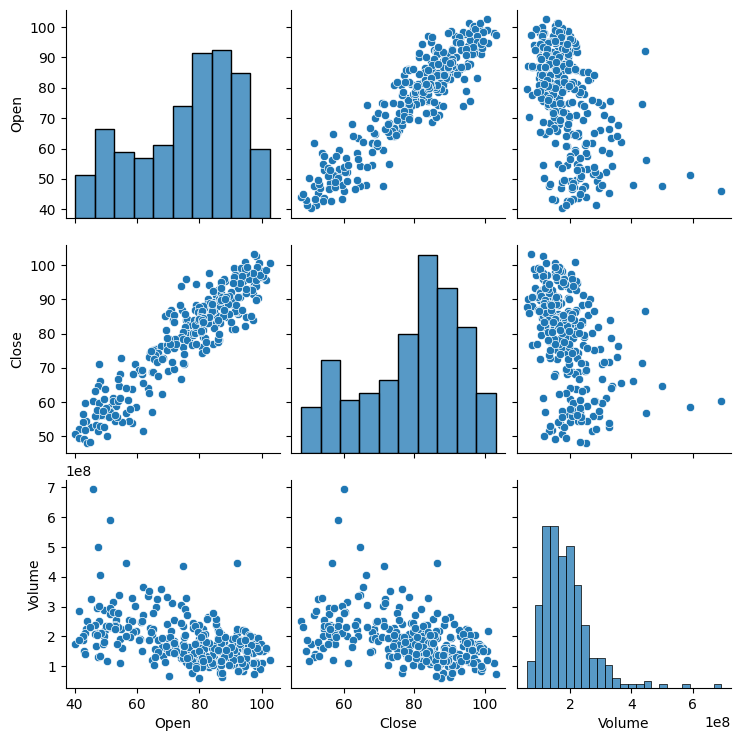

In [23]:
sns.pairplot(train_df, vars=['Open','Close', 'Volume'])
plt.show()

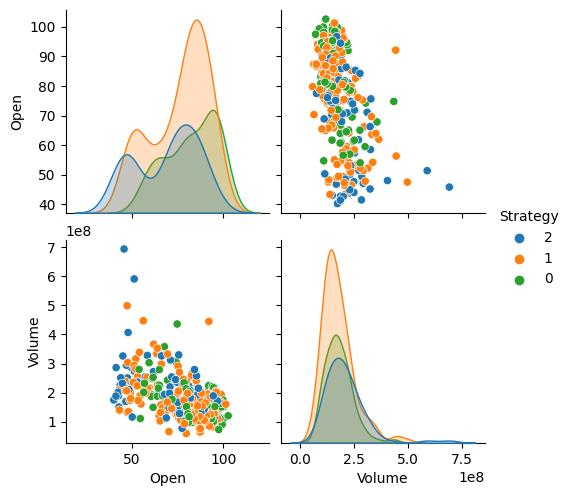

In [24]:
sns.pairplot(train_df[["Open","Volume","Strategy","Date"]],hue="Strategy")

Autocorrelation

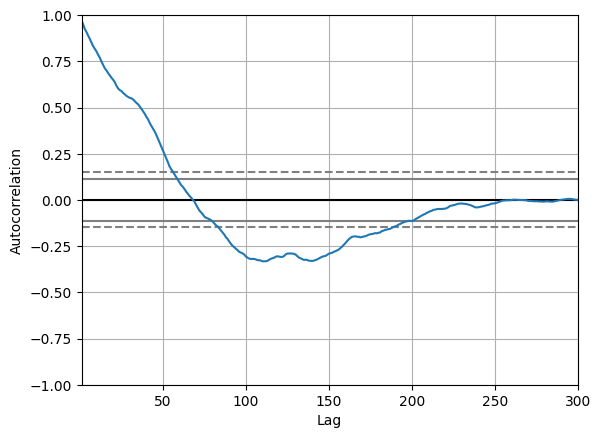

In [25]:
autocorrelation_plot(train_df['Open'])
plt.show()

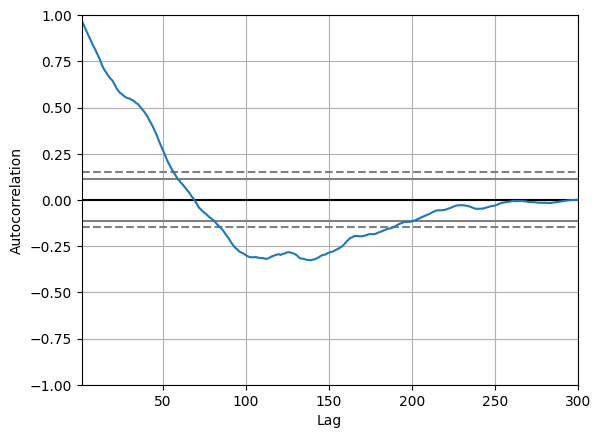

In [26]:
autocorrelation_plot(train_df['Close'])
plt.show()

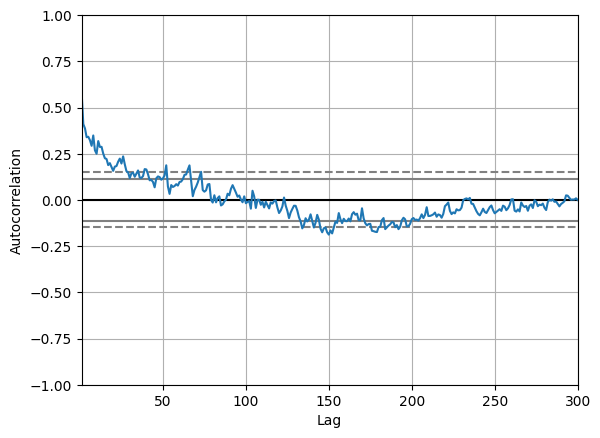

In [27]:
autocorrelation_plot(train_df['Volume'])
plt.show()

###Trend, Seasonality, Cyclicity, Irregularity

Seasonal Decomposition

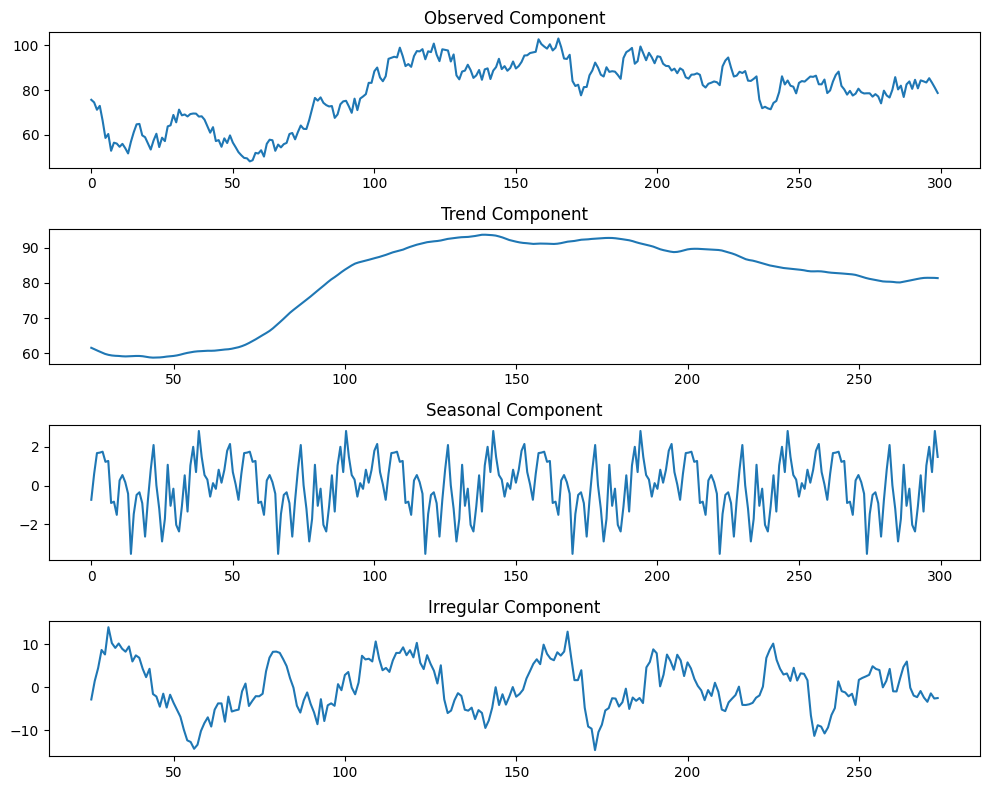

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train_df['Close'].values, model='additive', period=52)

# Plot
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title("Observed Component")

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title("Trend Component")

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title("Seasonal Component")

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title("Irregular Component")

plt.tight_layout()
plt.show()


####Cyclic pattern detection
FFT (Fast Fourier Transform)

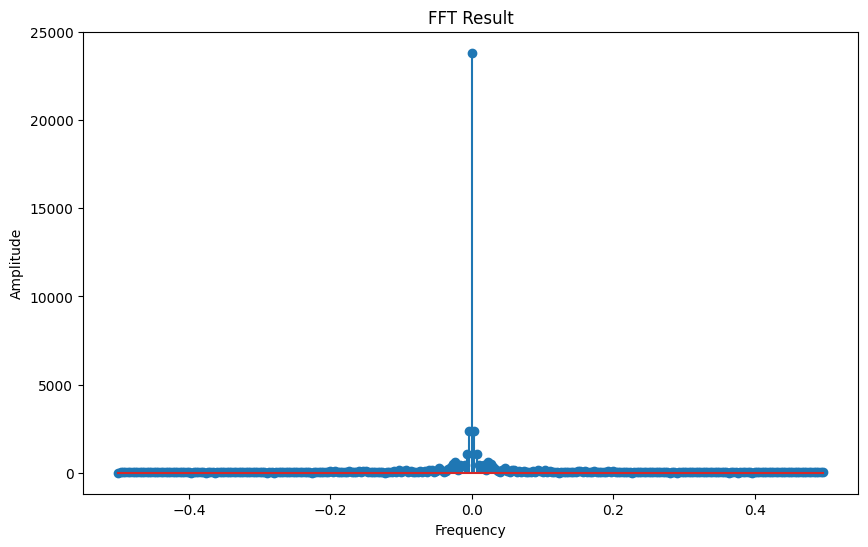

Dominant frequency: 0.0
Dominant period: inf


In [29]:
amplitude= train_df['Close'].values

fft_result = np.fft.fft(amplitude)
frequencies = np.fft.fftfreq(len(fft_result))
dominant_frequency = frequencies[np.argmax(np.abs(fft_result))]
dominant_period = 1 / abs(dominant_frequency)

plt.figure(figsize=(10, 6))
plt.stem(frequencies, np.abs(fft_result))
plt.title("FFT Result")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

print(f"Dominant frequency: {abs(dominant_frequency)}")
print(f"Dominant period: {dominant_period}")

Dominant frequency is 0.0 and the dominant period is calculated as infinity—implies that the FFT analysis couldn't detect a clear cyclic pattern

###Check for Stationarity
Augmented Dickey-Fuller test

In [30]:
from statsmodels.tsa.stattools import adfuller

val = train_df['Close'].values

result = adfuller(val)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.808006
p-value: 0.376494
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


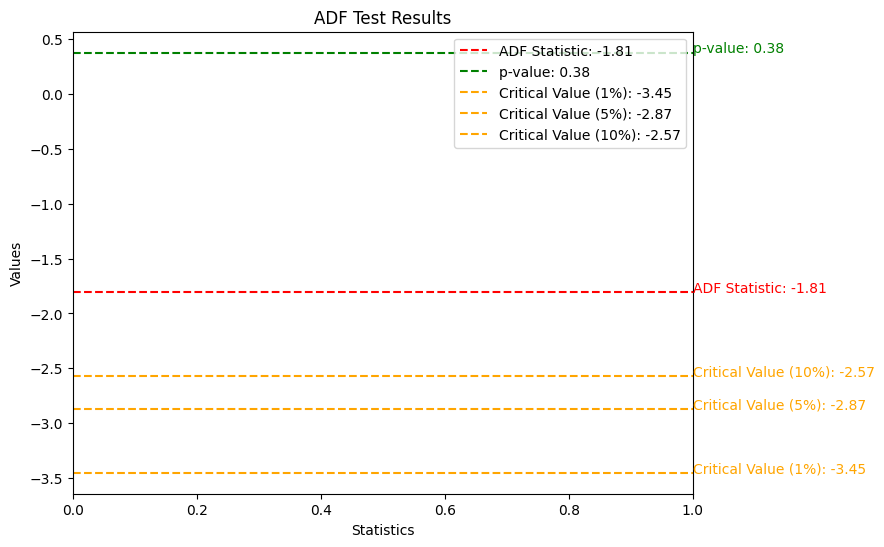

In [31]:
plt.figure(figsize=(8, 6))

plt.axhline(y=result[0], color='red', linestyle='--', label=f'ADF Statistic: {result[0]:.2f}')
plt.text(1, result[0], f'ADF Statistic: {result[0]:.2f}', color='red')

plt.axhline(y=result[1], color='green', linestyle='--', label=f'p-value: {result[1]:.2f}')
plt.text(1, result[1], f'p-value: {result[1]:.2f}', color='green')

for key, value in result[4].items():
    plt.axhline(y=value, color='orange', linestyle='--', label=f'Critical Value ({key}): {value:.2f}')
    plt.text(1, value, f'Critical Value ({key}): {value:.2f}', color='orange')

plt.legend()
plt.title('ADF Test Results')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.show()

The yellow dotted lines in the plot correspond to 90%, 95% and 99% confidence bands. If the autocorrelation crosses these bands, then it's statistically significant.

If the p-value is less than 0.05 and the ADF statistic is less than the critical values, we can reject the null hypothesis and say that data is stationary.

But we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that the time series is stationary.

<Figure size 1000x1000 with 0 Axes>

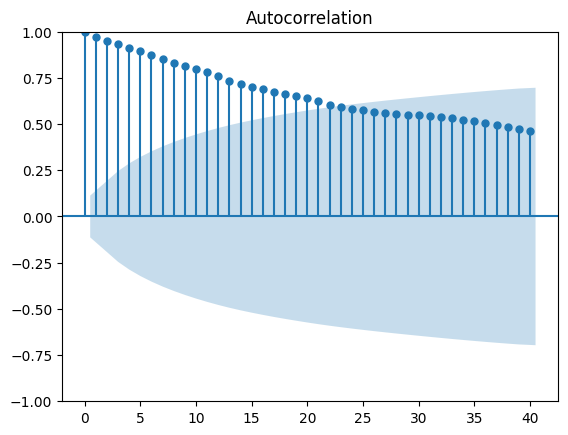

In [32]:
# plot auto-correlation
plt.figure(figsize=(10, 10))
plot_acf(train_df['Close'], lags=40)

plt.show()

If the autocorrelation for a given lag is outside its corresponding confidence interval, then it is statistically significant.
nlags = 40 specifies the number of lags to return autocorrelations for, and alpha=0.05 specifies a 95% confidence interval.  It suggests that the value of a series at a point in time is influenced by its values at previous points in time.

If the autocorrelation exceeds the confidence interval, it implies that a series value at a specific time is impacted by its past values, potentially indicating seasonal trends in the data.

The count of notable autocorrelations can help determine the order for an autoregressive model. For example, if only the initial three correlations are significant, it might imply that an AR(3) model could suit the data well.

When numerous significant autocorrelations lack a clear pattern, it might imply the data lacks stability, indicating the need for differencing to establish stability.

Inference:
- The autocorrelation values are relatively high, gradually decreasing as the time lag increases. The decrease suggests that the current observation is somewhat influenced by its previous observations, with decreasing impact over time.
- Most autocorrelations seem to be within the confidence intervals, which suggests that while there is some correlation between observations, it may not be statistically significant.

p: The autoregressive (AR) order, which is the number of lags of the differenced series to include in the model.

d: The differencing order, which is the number of times you need to difference the series to make it stationary.

q: The moving average (MA) order, which is the number of lags of the forecast errors to include in the model.

<Figure size 1000x1000 with 0 Axes>

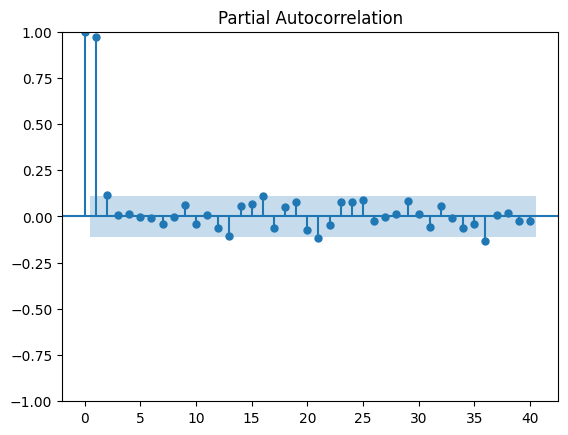

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
val = train_df['Close'].values

# Plot partial autocorrelation
plt.figure(figsize=(10, 10))
plot_pacf(val, lags=40)
plt.show()

The time series is perfectly correlated with itself at lag 0 and the PACF at lag 0 = 1 always.

The PACF at arbitrary lag (k) represents the correlation between the series values at time t & the values at time t-k after removal of the effects of the lags between 1 and k-1.

If the PACF at a specific lag, is is significantly different from zero, it suggests a direct relationship between current value and the value at that lag.
If the PACF is close to 1 or -1 (say, PACF = 0.8 or PACF = -0.8), it indicates a strong positive(+1) or negative(-1) correlation at that lag.

Confidence Intervals:

In the PACF plot also shows confidence intervals. A significant PACF value is one that falls outside the confidence interval.
If a PACF value is outside the confidence interval, it suggests that there is a significant partial autocorrelation at that lag.
A significant PACF value indicates a potential autoregressive (AR) term for your time series model, with the lag corresponding to the significant value.


Inference:
The decreasing and fluctuating partial autocorrelation values as lag increases might suggest a lack of direct relationship between observations at different time lags, and there might not be a strong association beyond lag 1.

####Close is not Stationary=> Make it stationary

In [34]:
train_df['Close_diff'] = train_df['Close'].diff()
train_df.dropna(inplace=True)
train_df.head()


,id,Date,Open,Close,Volume,Strategy,Close_diff
1,1,2015-06-08,64.116235,74.443331,227974800,1,-1.166647
2,2,2015-06-15,47.701942,71.140831,250670900,2,-3.302500
3,3,2015-06-22,54.754816,72.881344,223614300,1,1.740512
4,4,2015-06-29,48.031899,66.284718,406814900,2,-6.596626
5,5,2015-07-06,51.374399,58.494017,590857400,2,-7.790701


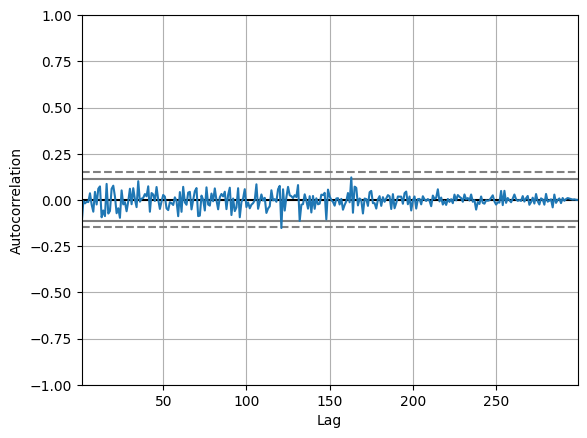

In [35]:
autocorrelation_plot(train_df['Close_diff'])
plt.show()

In [36]:
val = train_df['Close_diff'].values
result = adfuller(val)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.615948
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


The null hypothesis is rejected. This suggests that there is enough evidence to conclude that the timeseries is stationary.

<Figure size 1000x1000 with 0 Axes>

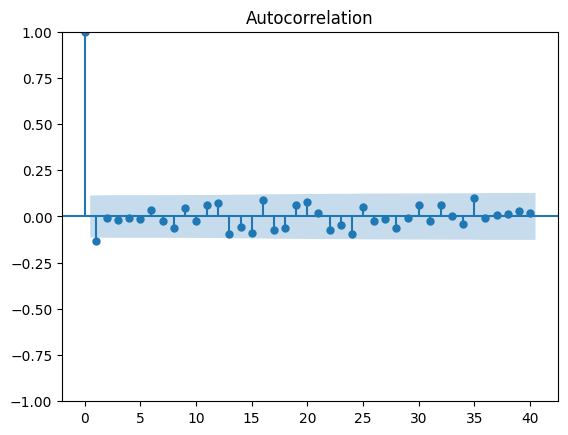

In [37]:
plt.figure(figsize=(10, 10))
plot_acf(train_df['Close_diff'], lags=40)

plt.show()

<Figure size 1000x1000 with 0 Axes>

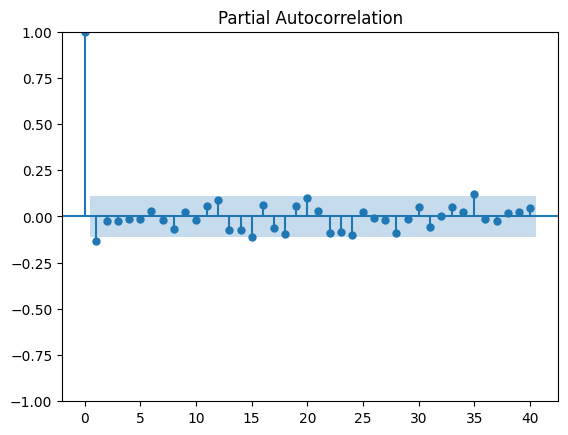

In [38]:
plt.figure(figsize=(10, 10))
plot_pacf(train_df['Close_diff'], lags=40)
plt.show()

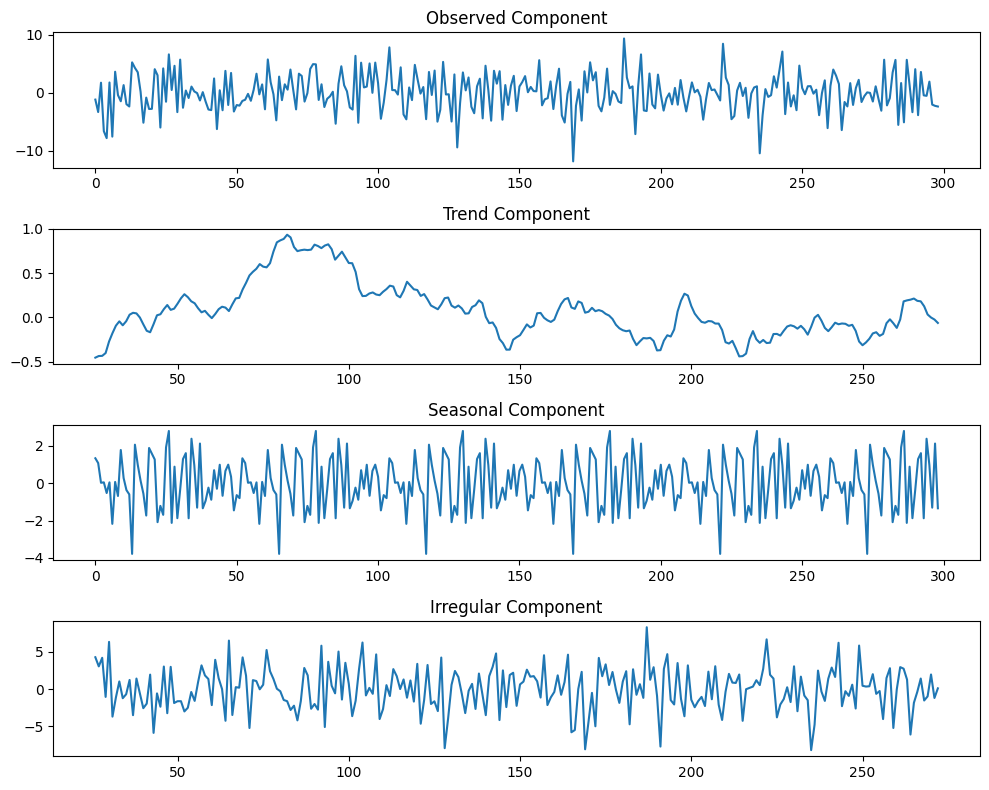

In [39]:
# Perform seasonal decomposition
result = seasonal_decompose(train_df['Close_diff'].values, model='additive', period=52)
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title("Observed Component")

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title("Trend Component")

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title("Seasonal Component")

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title("Irregular Component")

plt.tight_layout()
plt.show()


###Regression Plots

<Axes: xlabel='Open', ylabel='Close'>

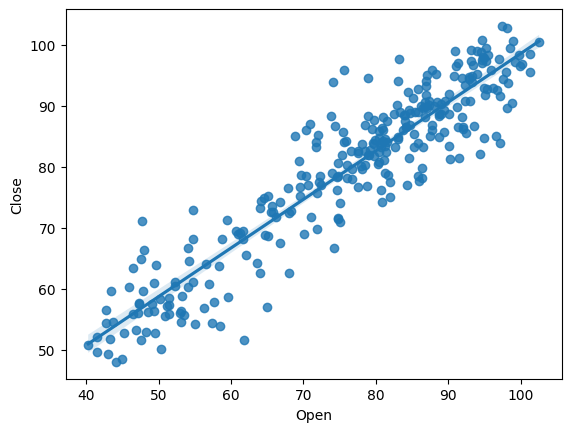

In [40]:
sns.regplot(x='Open', y='Close', data=train_df)


<Axes: xlabel='Volume', ylabel='Close'>

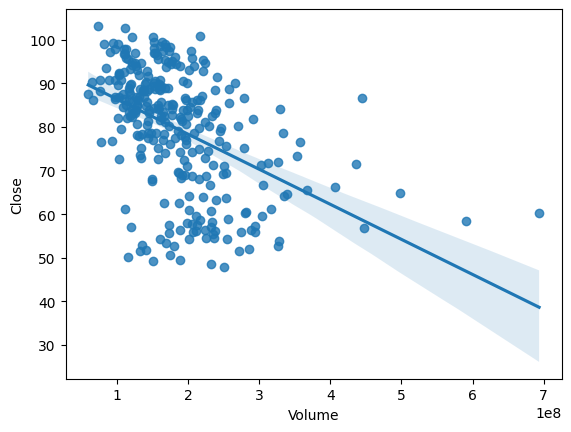

In [41]:
sns.regplot(x='Volume', y='Close', data=train_df)

In [42]:
def train_ARIMA(data,order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    aic = model_fit.aic
    return aic

def find_best_pdq(p_val,d_val,q_val,data):
    p_values = range(0, p_val)
    d_values = range(0, d_val)
    q_values = range(0, q_val)

    best_aic = float("inf")
    best_order=[0,0,0]
    #Grid Search
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = [p, d, q]
                try:
                    aic = train_ARIMA(data,order)
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                except:
                    print(p,d,q)
                    continue

    #Best model and order
    print("Best AIC: {:.2f}".format(best_aic))
    print("Best ARIMA Order (p, d, q):", best_order)
    return best_order


# Feature Engineering

In [43]:
X=train_df.copy()
X.head()


,id,Date,Open,Close,Volume,Strategy,Close_diff
1,1,2015-06-08,64.116235,74.443331,227974800,1,-1.166647
2,2,2015-06-15,47.701942,71.140831,250670900,2,-3.302500
3,3,2015-06-22,54.754816,72.881344,223614300,1,1.740512
4,4,2015-06-29,48.031899,66.284718,406814900,2,-6.596626
5,5,2015-07-06,51.374399,58.494017,590857400,2,-7.790701


In [44]:
X.drop(['Strategy','id','Date','Volume','Close','Close_diff'],axis=1,inplace=True)
Y=train_df['Close']

X.head()

,Open
1,64.116235
2,47.701942
3,54.754816
4,48.031899
5,51.374399


In [45]:
Y.head()

1    74.443331
2    71.140831
3    72.881344
4    66.284718
5    58.494017
Name: Close, dtype: float64

In [46]:
size = int(0.8 * len(train_df))  # 80-20 split

# Split the data into training and testing sets based on the cutoff index
X_train, X_test = X[:size], X[size:]
y_train, y_test = Y[:size], Y[size:]

In [47]:
print("x train", X_train.shape)
print("x test", X_test.shape)
print("y train", y_train.shape)
print("y test", y_test.shape)

endog= y_train
exog= X_train[['Open']]

print("Endog:", endog, sep="\n")
print("Exog:", exog, sep="\n")


x train (239, 1)
x test (60, 1)
y train (239,)
y test (60,)
Endog:
1      74.443331
2      71.140831
3      72.881344
4      66.284718
5      58.494017
         ...    
235    86.112819
236    75.709994
237    71.838126
238    72.476366
239    71.770781
Name: Close, Length: 239, dtype: float64
Exog:
          Open
1    64.116235
2    47.701942
3    54.754816
4    48.031899
5    51.374399
..         ...
235  70.289227
236  71.841477
237  66.278431
238  67.967818
239  71.108020

[239 rows x 1 columns]


# SARIMAX

**Why SARIMAX?**
- Incorporation of Seasonal Components: SARIMAX can capture and model seasonal patterns in stock data, which can be crucial in financial markets where seasonality plays a significant role.

- Exogenous Variables: It allows the inclusion of exogenous variables or predictors that might influence stock prices as calculated in Feature Engineering

- Time Series Analysis: SARIMAX is effective for modeling time series data, where stock prices often exhibit patterns and dependencies based on historical values.

- Statistical Rigor: SARIMAX models are based on a solid statistical foundation and can handle various time series properties such as stationarity, seasonality, trends, etc.

- Forecasting Accuracy: It has a good track record in providing reasonably accurate short to medium-term forecasts


In [48]:
def smape(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

In [49]:
def metrics_y(pred, test):
  print("MAE: ",mean_absolute_error(pred,test))
  print("MSE: ",mean_squared_error(pred,test))
  print("RMSE: ",np.sqrt(mean_squared_error(pred,test)))
  print("SMAPE", smape(pred,test))

In [50]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(7, 0, 3))
model_fit = mod.fit()
test_endog = y_test
test_exog= X_test[['Open']]
predicted_close = model_fit.forecast(steps=len(test_endog), exog=test_exog)
predicted_close

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54251D+00    |proj g|=  1.45501D+00

At iterate    5    f=  2.79365D+00    |proj g|=  1.55580D-01

At iterate   10    f=  2.63118D+00    |proj g|=  6.18920D-02

At iterate   15    f=  2.62148D+00    |proj g|=  1.40296D-02

At iterate   20    f=  2.62087D+00    |proj g|=  1.01641D-02

At iterate   25    f=  2.62057D+00    |proj g|=  5.41521D-03

At iterate   30    f=  2.62003D+00    |proj g|=  2.76916D-03

At iterate   35    f=  2.61997D+00    |proj g|=  3.87272D-03

At iterate   40    f=  2.61922D+00    |proj g|=  1.11306D-02

At iterate   45    f=  2.61856D+00    |proj g|=  1.99133D-02

At iterate   50    f=  2.61751D+00    |proj g|=  1.39126D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


239    70.431523
240    70.216803
241    69.888774
242    69.512711
243    70.011431
244    69.972504
245    69.997272
246    69.823996
247    69.251440
248    68.620079
249    69.067519
250    69.485833
251    69.237061
252    68.785584
253    69.330742
254    69.052846
255    68.823692
256    69.677260
257    69.282176
258    68.661590
259    68.774245
260    68.042333
261    68.761561
262    69.478719
263    69.478773
264    68.951885
265    69.017579
266    68.960109
267    68.596699
268    69.264012
269    69.055895
270    68.693287
271    68.806762
272    69.160550
273    68.548911
274    69.035032
275    68.948715
276    68.246601
277    68.793984
278    68.397585
279    67.840033
280    67.144960
281    67.877544
282    67.711231
283    67.792482
284    67.527872
285    67.431183
286    67.197364
287    67.297187
288    67.166551
289    66.823874
290    66.731750
291    66.883015
292    66.730196
293    66.595182
294    66.596450
295    67.573210
296    67.516870
297    67.9159

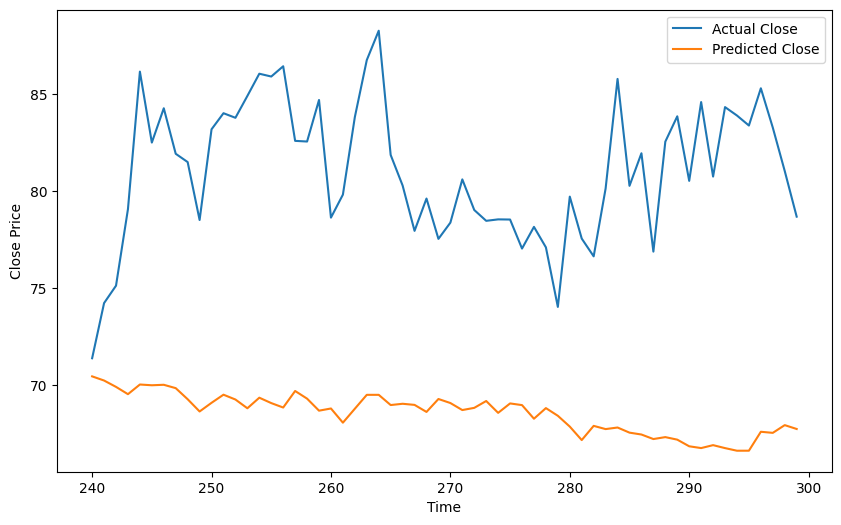

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(y_test.index, predicted_close, label='Predicted Close')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [52]:
metrics_y(predicted_close,y_test)

MAE:  12.526084671312084
MSE:  171.24488778417492
RMSE:  13.086056999118371
SMAPE 0.08373479243260411


In [53]:
exog_X_test = X_test[['Open']]
exog_test_df = test_df[['Open']]
new_exog =  pd.concat([exog_X_test,exog_test_df], ignore_index=True)
new_exog.shape

(160, 1)

In [54]:
predicted_close = model_fit.forecast(steps=len(new_exog), exog=new_exog)
predicted_close

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


239    70.431523
240    70.216803
241    69.888774
242    69.512711
243    70.011431
         ...    
394    63.650362
395    63.155134
396    62.964649
397    63.679393
398    63.438122
Name: predicted_mean, Length: 160, dtype: float64

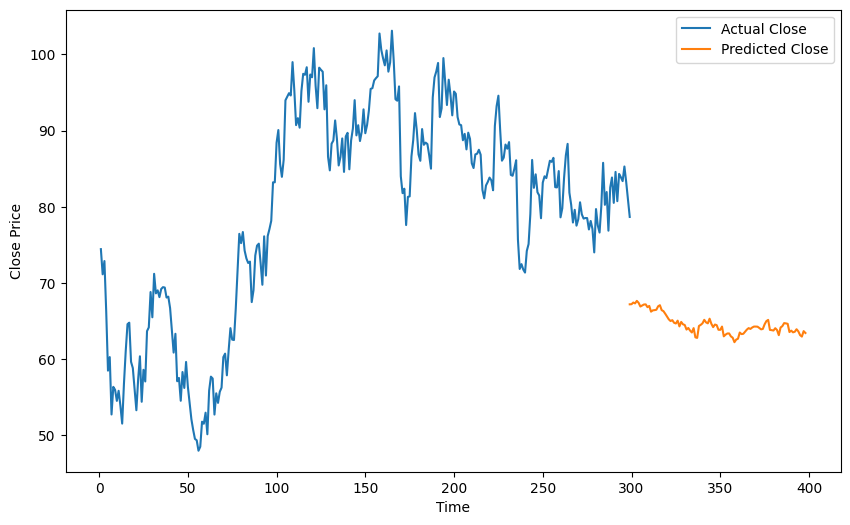

In [55]:
test_pred=predicted_close[-100:]
plt.figure(figsize=(10, 6))
plt.plot( train_df['Close'], label='Actual Close')
plt.plot( test_pred, label='Predicted Close')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Features Creation:

In [56]:
#Market Participation
train_df['Market_Participation']=train_df["Volume"]/ (train_df['Open'])**4
test_df['Market_Participation']=test_df["Volume"]/ (test_df['Open'])**4

#Log of Volume
train_df['log_Volume']= np.log(train_df['Volume'])
test_df['log_Volume']= np.log(test_df['Volume'])

#Moving average of the 'Open' and 'Volume' column
window_size = 5
train_df['OpenMA'] = train_df['Open'].rolling(window=window_size).mean()
window_size= 5
train_df['VolumeMA'] = train_df['Volume'].rolling(window=window_size).mean()

test_df['OpenMA'] = test_df['Open'].rolling(window=window_size).mean()
window_size= 5
test_df['VolumeMA'] = test_df['Volume'].rolling(window=window_size).mean()

#Diff value
train_df['Open_diff']= train_df["Open"].diff()
train_df['Volume_diff'] = train_df["Volume"].diff()

test_df['Open_diff']= test_df["Open"].diff()
test_df['Volume_diff'] = test_df["Volume"].diff()

#MACD (Moving Average Convergence Divergence)
shortWindow = 14
longWindow = 21

emaShort = train_df['Open'].ewm(span=shortWindow, adjust=True).mean()
emaLong = train_df['Open'].ewm(span=longWindow, adjust=True).mean()
train_df['MACD'] = emaShort - emaLong

emaShort = test_df['Open'].ewm(span=shortWindow, adjust=True).mean()
emaLong = test_df['Open'].ewm(span=longWindow, adjust=True).mean()
test_df['MACD'] = emaShort - emaLong

# Signal line for MACD
signalWindow = 9
train_df['MACD_Sig'] = train_df['MACD'].ewm(span=signalWindow, adjust=True).mean()
test_df['MACD_Sig'] = test_df['MACD'].ewm(span=signalWindow, adjust=True).mean()



In [57]:
train_df.isna().sum()

id                      0
Date                    0
Open                    0
Close                   0
Volume                  0
Strategy                0
Close_diff              0
Market_Participation    0
log_Volume              0
OpenMA                  4
VolumeMA                4
Open_diff               1
Volume_diff             1
MACD                    0
MACD_Sig                0
dtype: int64

In [58]:
test_df.isna().sum()

id                      0
Date                    0
Open                    0
Volume                  0
Market_Participation    0
log_Volume              0
OpenMA                  4
VolumeMA                4
Open_diff               1
Volume_diff             1
MACD                    0
MACD_Sig                0
dtype: int64

In [59]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)
test_df.head()

,id,Date,Open,Volume,Market_Participation,log_Volume,OpenMA,VolumeMA,Open_diff,Volume_diff,MACD,MACD_Sig
0,0,2021-03-01,72.708331,205897600,7.367406,19.142890,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,1,2021-03-08,73.310886,214095600,7.411974,19.181933,0.000000,0.0,0.602555,8198000.0,0.007173,0.003985
2,2,2021-03-15,70.610119,151601700,6.098686,18.836767,0.000000,0.0,-2.700767,-62493900.0,-0.035261,-0.012099
3,3,2021-03-22,70.256017,193982500,7.962115,19.083279,0.000000,0.0,-0.354102,42380800.0,-0.060557,-0.028514
4,4,2021-03-29,68.258324,220238400,10.145432,19.210221,71.028735,197163160.0,-1.997693,26255900.0,-0.115225,-0.054309


# Features used: MACD, MACD_Sig, Open, Open_MA,id

In [60]:
X=train_df[['MACD','MACD_Sig','Open','OpenMA','id']]
Y=train_df['Close']

X.head()

,MACD,MACD_Sig,Open,OpenMA,id
1,0.000000,0.000000,64.116235,0.000000,1
2,-0.195408,-0.108560,47.701942,0.000000,2
3,-0.133316,-0.118706,54.754816,0.000000,3
4,-0.230454,-0.156561,48.031899,0.000000,4
5,-0.208231,-0.171932,51.374399,53.195858,5


In [61]:
Y.head()

1    74.443331
2    71.140831
3    72.881344
4    66.284718
5    58.494017
Name: Close, dtype: float64

In [62]:
size = int(0.8 * len(train_df))  # 80-20 split

# Split the data into training and testing sets based on the cutoff index
X_train, X_test = X[:size], X[size:]
y_train, y_test = Y[:size], Y[size:]

In [63]:
print("x train", X_train.shape)
print("x test", X_test.shape)
print("y train", y_train.shape)
print("y test", y_test.shape)

endog= y_train
exog= X_train[['MACD','MACD_Sig','Open','OpenMA','id']]

print("Endog:", endog, sep="\n")
print("Exog:", exog, sep="\n")

x train (239, 5)
x test (60, 5)
y train (239,)
y test (60,)
Endog:
1      74.443331
2      71.140831
3      72.881344
4      66.284718
5      58.494017
         ...    
235    86.112819
236    75.709994
237    71.838126
238    72.476366
239    71.770781
Name: Close, Length: 239, dtype: float64
Exog:
         MACD  MACD_Sig       Open     OpenMA   id
1    0.000000  0.000000  64.116235   0.000000    1
2   -0.195408 -0.108560  47.701942   0.000000    2
3   -0.133316 -0.118706  54.754816   0.000000    3
4   -0.230454 -0.156561  48.031899   0.000000    4
5   -0.208231 -0.171932  51.374399  53.195858    5
..        ...       ...        ...        ...  ...
235 -1.758143 -0.957229  70.289227  75.198335  235
236 -1.895712 -1.144926  71.841477  72.747574  236
237 -2.217129 -1.359366  66.278431  69.792699  237
238 -2.371822 -1.561857  67.967818  69.050019  238
239 -2.331731 -1.715832  71.108020  69.496995  239

[239 rows x 5 columns]


In [64]:
mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog,order=(7,0,3), seasonal_order=(7,0,3,12))
model_fit = mod.fit(exog=exog)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30378D+00    |proj g|=  1.07596D+00


 This problem is unconstrained.



At iterate    5    f=  2.99351D+00    |proj g|=  6.99655D-01

At iterate   10    f=  2.83401D+00    |proj g|=  5.25967D-01

At iterate   15    f=  2.75612D+00    |proj g|=  1.68782D-01

At iterate   20    f=  2.61061D+00    |proj g|=  7.86109D-02

At iterate   25    f=  2.59303D+00    |proj g|=  2.37705D-02

At iterate   30    f=  2.55002D+00    |proj g|=  8.05981D-02

At iterate   35    f=  2.51610D+00    |proj g|=  7.22050D-02

At iterate   40    f=  2.49454D+00    |proj g|=  4.81860D-02

At iterate   45    f=  2.47927D+00    |proj g|=  1.50667D-02

At iterate   50    f=  2.47754D+00    |proj g|=  8.43385D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [65]:
test_endog = y_test
test_exog= X_test[['MACD','MACD_Sig','Open','OpenMA','id']]

In [66]:
predicted_close = model_fit.forecast(steps=len(test_endog), exog=test_exog)
predicted_close

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


239    70.151019
240    68.528964
241    72.854663
242    73.114285
243    73.430958
244    75.371374
245    76.691587
246    77.491423
247    75.238069
248    76.308741
249    80.578936
250    81.857238
251    83.674789
252    84.187164
253    83.822627
254    85.336779
255    85.602015
256    86.767728
257    86.980066
258    87.395121
259    88.048935
260    88.118002
261    88.945609
262    88.551614
263    89.914290
264    87.282848
265    87.123543
266    87.384516
267    87.050549
268    86.398493
269    85.121019
270    83.944528
271    83.533057
272    82.565927
273    82.921999
274    83.090102
275    81.729110
276    82.155668
277    82.807596
278    82.699593
279    81.536836
280    82.661107
281    85.119172
282    87.097143
283    87.251027
284    87.604934
285    87.934062
286    88.042246
287    90.783353
288    90.349192
289    89.787944
290    91.362775
291    92.349924
292    92.254957
293    93.443109
294    92.804860
295    93.348056
296    92.108378
297    92.4710

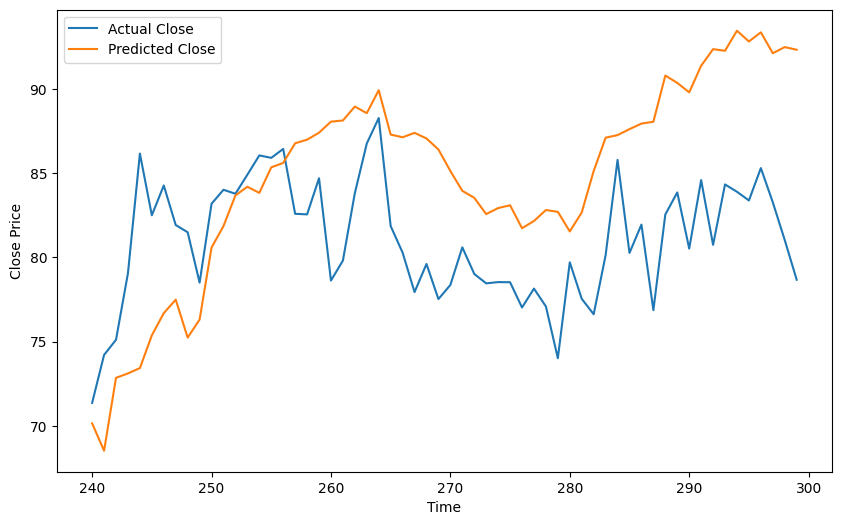

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(y_test.index, predicted_close, label='Predicted Close')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [68]:
metrics_y(predicted_close,y_test)

MAE:  5.84583298188576
MSE:  44.79664967510486
RMSE:  6.693029932332953
SMAPE 0.03390895670525301


In [69]:
exog_X_test = X_test[['MACD','MACD_Sig','Open','OpenMA','id']]
exog_test = test_df[['MACD','MACD_Sig','Open','OpenMA','id']]
final_exog =  pd.concat([exog_X_test,exog_test], ignore_index=True)

In [70]:
predicted_close = model_fit.forecast(steps=len(final_exog), exog=final_exog)
predicted_close

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


239    70.151019
240    68.528964
241    72.854663
242    73.114285
243    73.430958
         ...    
394    57.794181
395    58.798089
396    60.513913
397    60.698860
398    61.912325
Name: predicted_mean, Length: 160, dtype: float64

In [71]:
test_size=len(test_df)
test_pred=predicted_close[-test_size:]
test_df.head()

,id,Date,Open,Volume,Market_Participation,log_Volume,OpenMA,VolumeMA,Open_diff,Volume_diff,MACD,MACD_Sig
0,0,2021-03-01,72.708331,205897600,7.367406,19.142890,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,1,2021-03-08,73.310886,214095600,7.411974,19.181933,0.000000,0.0,0.602555,8198000.0,0.007173,0.003985
2,2,2021-03-15,70.610119,151601700,6.098686,18.836767,0.000000,0.0,-2.700767,-62493900.0,-0.035261,-0.012099
3,3,2021-03-22,70.256017,193982500,7.962115,19.083279,0.000000,0.0,-0.354102,42380800.0,-0.060557,-0.028514
4,4,2021-03-29,68.258324,220238400,10.145432,19.210221,71.028735,197163160.0,-1.997693,26255900.0,-0.115225,-0.054309


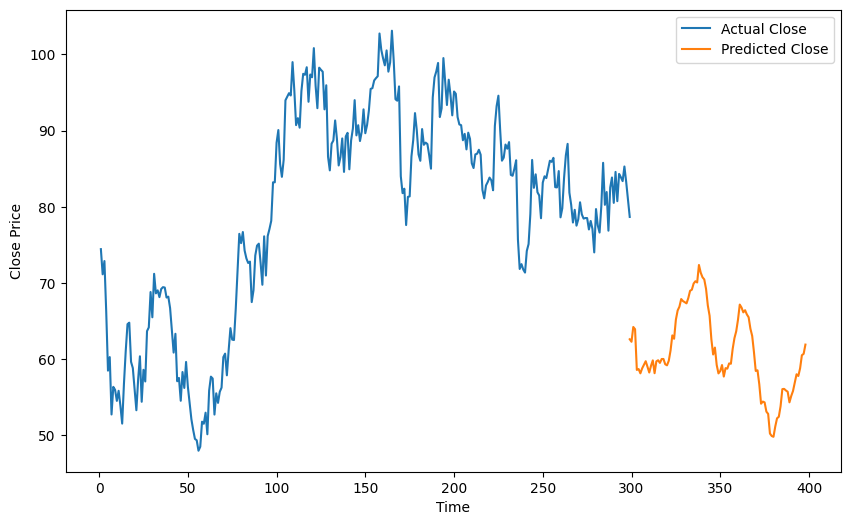

In [72]:
plt.figure(figsize=(10, 6))
plt.plot( train_df['Close'], label='Actual Close')
plt.plot( test_pred, label='Predicted Close')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Predicted Close values added to Test

In [73]:
test_df.head()

,id,Date,Open,Volume,Market_Participation,log_Volume,OpenMA,VolumeMA,Open_diff,Volume_diff,MACD,MACD_Sig
0,0,2021-03-01,72.708331,205897600,7.367406,19.142890,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,1,2021-03-08,73.310886,214095600,7.411974,19.181933,0.000000,0.0,0.602555,8198000.0,0.007173,0.003985
2,2,2021-03-15,70.610119,151601700,6.098686,18.836767,0.000000,0.0,-2.700767,-62493900.0,-0.035261,-0.012099
3,3,2021-03-22,70.256017,193982500,7.962115,19.083279,0.000000,0.0,-0.354102,42380800.0,-0.060557,-0.028514
4,4,2021-03-29,68.258324,220238400,10.145432,19.210221,71.028735,197163160.0,-1.997693,26255900.0,-0.115225,-0.054309


In [74]:
combined_df= test_df[['id','Date','Open','Volume']]

combined_df.head()

,id,Date,Open,Volume
0,0,2021-03-01,72.708331,205897600
1,1,2021-03-08,73.310886,214095600
2,2,2021-03-15,70.610119,151601700
3,3,2021-03-22,70.256017,193982500
4,4,2021-03-29,68.258324,220238400


In [75]:
test_pred.head()

299    62.615676
300    62.281698
301    64.225386
302    63.934305
303    58.588380
Name: predicted_mean, dtype: float64

In [76]:
combined_df['Close']=test_pred.values
combined_df.head()

,id,Date,Open,Volume,Close
0,0,2021-03-01,72.708331,205897600,62.615676
1,1,2021-03-08,73.310886,214095600,62.281698
2,2,2021-03-15,70.610119,151601700,64.225386
3,3,2021-03-22,70.256017,193982500,63.934305
4,4,2021-03-29,68.258324,220238400,58.588380


# Stratergy Prediction

In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

train=pd.read_csv("/kaggle/input/ue21cs342aa2/train.csv")
data=train.copy()

data['Date'] = pd.to_datetime(data['Date'])
#Market Participation
data['Market_Participation']=data["Volume"]/ (data['Open'])**4

#Log of Volume
data['log_Volume']= np.log(data['Volume'])

#Moving average of the 'Open' and 'Volume' column
window_size = 5
data['OpenMA'] = data['Open'].rolling(window=window_size).mean()
window_size= 5
data['VolumeMA'] = data['Volume'].rolling(window=window_size).mean()

#Diff value
data['Open_diff']= data["Open"].diff()
data['Volume_diff'] = data["Volume"].diff()

#MACD (Moving Average Convergence Divergence)
shortWindow = 14
longWindow = 21

emaShort = data['Open'].ewm(span=shortWindow, adjust=True).mean()
emaLong = data['Open'].ewm(span=longWindow, adjust=True).mean()
data['MACD'] = emaShort - emaLong

# Signal line for MACD
signalWindow = 9
data['MACD_Sig'] = data['MACD'].ewm(span=signalWindow, adjust=True).mean()

data['SMA'] = data['Close'].rolling(window=10).mean()

data['Strategy'] = data['Strategy'].astype('category')
data['Strategy'] = data['Strategy'].map({"Hold":1,"Buy":2,"Sell":0})
data['Strategy'].value_counts()
data.head()


# Use LabelEncoder to encode class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform( data['Strategy'])

features = ['Open','Close', 'SMA','OpenMA','MACD','MACD_Sig']
X =  data[features]

X.fillna(0, inplace=True)
X.head()

,Open,Close,SMA,OpenMA,MACD,MACD_Sig
0,66.208486,75.609978,0.0,0.000000,0.000000,0.000000
1,64.116235,74.443331,0.0,0.000000,-0.024908,-0.013838
2,47.701942,71.140831,0.0,0.000000,-0.301701,-0.131815
3,54.754816,72.881344,0.0,0.000000,-0.285817,-0.183983
4,48.031899,66.284718,0.0,56.162676,-0.413026,-0.252118


In [78]:

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

print(X.shape)
print(y.shape)


(300, 6)
(300,)


In [79]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

**Why KNN?**
- Simple Implementation: KNN is straightforward to understand and implement. It doesn't make strong assumptions about the underlying data distribution, making it versatile for various types of data, including stock market data.

- Non-parametric Nature: KNN doesn't assume a specific form for the decision boundary. It can capture complex relationships within the data without imposing strict assumptions, which could be beneficial in the unpredictable and non-linear nature of stock market data.

- Classification Capabilities: KNN can be used effectively for classification tasks, such as predicting trading strategies (e.g., "Buy," "Hold," "Sell"). By considering the historical features of a stock and finding the most similar instances from the past, KNN can suggest a strategy based on the majority vote or weighted average of the nearest neighbors.

- Feature Importance: KNN can potentially provide insights into the importance of different features in the classification process. It identifies the features most influential in determining the strategy by evaluating the distances of the nearest neighbors.

In [80]:
# Create and train the KNN classifier with hyperparameter tuning
param_grid = {'n_neighbors': [5]}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_knn_classifier = grid_search.best_estimator_

print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Hyperparameters: {'n_neighbors': 5}


In [81]:
y_train_pred = best_knn_classifier.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy with KNN: {train_accuracy}")

# Make predictions on the validation set
y_valid_pred = best_knn_classifier.predict(X_valid_scaled)
# Calculate the validation accuracy
validation_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy with KNN: {validation_accuracy}")


Train Accuracy with KNN: 0.825
Validation Accuracy with KNN: 0.85


In [82]:
test_data = combined_df

test_data['Date'] = pd.to_datetime(test_data['Date'])
#Market Participation
test_data['Market_Participation']=test_data["Volume"]/ (data['Open'])**4

#Log of Volume
test_data['log_Volume']= np.log(test_data['Volume'])

#Moving average of the 'Open' and 'Volume' column
window_size = 5
test_data['OpenMA'] = test_data['Open'].rolling(window=window_size).mean()
window_size= 5
test_data['VolumeMA'] = test_data['Volume'].rolling(window=window_size).mean()

#Diff value
test_data['Open_diff']= test_data["Open"].diff()
test_data['Volume_diff'] = test_data["Volume"].diff()

#MACD (Moving Average Convergence Divergence)
shortWindow = 14
longWindow = 21

emaShort = test_data['Open'].ewm(span=shortWindow, adjust=True).mean()
emaLong = test_data['Open'].ewm(span=longWindow, adjust=True).mean()
test_data['MACD'] = emaShort - emaLong

# Signal line for MACD
signalWindow = 9
test_data['MACD_Sig'] = test_data['MACD'].ewm(span=signalWindow, adjust=True).mean()

test_data['SMA'] = test_data['Close'].rolling(window=10).mean()

In [83]:
X_test = test_data[features]
X_test = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test)

# Use the trained KNN classifier to make predictions on the test data
y_test_pred = best_knn_classifier.predict(X_test_scaled)

y_test_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2])

In [84]:
reverse_mapping = {0: 'Sell', 1: 'Hold', 2: 'Buy'}

reverse_predicted_strategy = [reverse_mapping[pred] for pred in y_test_pred]
reverse_predicted_strategy

['Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Sell',
 'Sell',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Sell',
 'Hold',
 'Hold',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Buy',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Buy',
 'Buy',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Hold',
 'Buy',
 'Buy',
 'Hold',
 'Buy']

In [85]:
test_data['Strategy']= reverse_predicted_strategy
test_data.head()

,id,Date,Open,Volume,Close,Market_Participation,log_Volume,OpenMA,VolumeMA,Open_diff,Volume_diff,MACD,MACD_Sig,SMA,Strategy
0,0,2021-03-01,72.708331,205897600,62.615676,10.715111,19.142890,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,Buy
1,1,2021-03-08,73.310886,214095600,62.281698,12.668806,19.181933,NaN,NaN,0.602555,8198000.0,0.007173,0.003985,NaN,Buy
2,2,2021-03-15,70.610119,151601700,64.225386,29.279243,18.836767,NaN,NaN,-2.700767,-62493900.0,-0.035261,-0.012099,NaN,Buy
3,3,2021-03-22,70.256017,193982500,63.934305,21.581084,19.083279,NaN,NaN,-0.354102,42380800.0,-0.060557,-0.028514,NaN,Buy
4,4,2021-03-29,68.258324,220238400,58.588380,41.378429,19.210221,71.028735,197163160.0,-1.997693,26255900.0,-0.115225,-0.054309,NaN,Buy


In [86]:
submission = pd.DataFrame()
submission["Date"] = test_df["Date"]

In [87]:
submission["Close"] = test_data["Close"]
submission["Strategy"] = test_data["Strategy"]

In [88]:
submission.head()

,Date,Close,Strategy
0,2021-03-01,62.615676,Buy
1,2021-03-08,62.281698,Buy
2,2021-03-15,64.225386,Buy
3,2021-03-22,63.934305,Buy
4,2021-03-29,58.588380,Buy


In [89]:
submission.to_csv('submission.csv', index=True,index_label='id')